# PS2-1: Logistic Regression: Training Stability

## Import Library

In [82]:
import numpy as np
import matplotlib.pyplot as plt

import Full_Problem_Set.PS2.src.p01_lr as lr
import Full_Problem_Set.PS2.src.util as util

## Load Dataset

In [83]:
x_train_a, y_train_a = util.load_csv('/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS2/data/ds1_a.csv', add_intercept=True)

x_train_b, y_train_b = util.load_csv('/home/anhnt02/Desktop/CS229-Fall2018-FullCourse/Full_Problem_Set/PS2/data/ds1_b.csv', add_intercept=True)

## Plot dataset

In [84]:
def plot_dataset(x_train, y_train, title):
    plt.figure()

    #Draw x0, x1
    plt.plot(x_train[y_train == 1, 1], x_train[y_train == 1, 2], 'bx', linewidth=2)
    plt.plot(x_train[y_train == -1, 1], x_train[y_train == -1, 2], 'go', linewidth=2)

    #Title
    plt.title(title)
    #x_axis
    plt.xlabel('x0')
    #y_axis
    plt.ylabel('x1')
    plt.show()

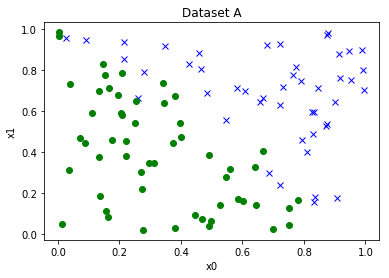

In [85]:
#Dataset A
plot_dataset(x_train_a, y_train_a, 'Dataset A')

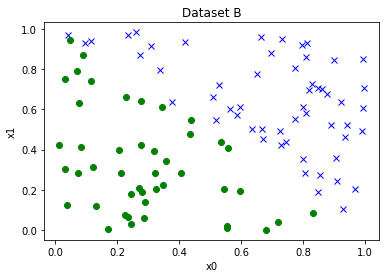

In [86]:
#Dataset B
plot_dataset(x_train_b, y_train_b, 'Dataset B')

## Train 2 models on Dataset A & Dataset B

### Fit Dataset to Model

In [87]:
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

In [88]:
def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            if i >= 500000:
                print('DIVERGENCED!!!')
                break
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

### Training Model

In [89]:
print('==== Training model on data set A ====')
logistic_regression(x_train_a, y_train_a)

print('\n==== Training model on data set B ====')
logistic_regression(x_train_b, y_train_b)

==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30395 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310

## a)

The algorithms is convergenced in Dataset A, while Dataset B is divergenced.

## b)